# Imports

In [230]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Load data

In [231]:
df_performance = pandas.read_csv('performance.csv', sep=";")
df_performance

,Model,Q3,SE Q3
0,SeqVec embeddings,73.2,0.6
1,SeqVec MSA embeddings,78.3,0.6
2,SeqVec MSA consensus,76.5,0.4
3,SeqVec PSSM (model 0),NaN,NaN
4,SeqVec PSSM (model 1),NaN,NaN
5,Bert embeddings,NaN,NaN
6,Bert MSA embeddings,NaN,NaN
7,Bert MSA consensus,NaN,NaN
8,Bert PSSM (model 0),NaN,NaN
9,Bert PSSM (model 1),NaN,NaN


In [232]:
labels = df_performance['Model']
q3 = df_performance['Q3']
se = df_performance['SE Q3']
majority_class_performance = df_performance['Q3'][16]
difference_to_random = [entry - majority_class_performance for entry in q3]

In [233]:
df_models = pandas.read_csv('overview_method_performances.csv', sep=";")
df_models

,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
0,bindEmbed21DL,1,F1-all,47.000,CI: 2,PR ligand binding,TestSet225,https://www.biorxiv.org/content/10.1101/2021.0...
1,bindPredictML17,0,F1-all,34.000,CI: 2,PR ligand binding,TestSet225,Performance: https://www.biorxiv.org/content/1...
2,Random: PR ligand binding,0,NaN,NaN,NaN,PR ligand binding,NaN,NaN
3,ConSeq-19equal,0,MCC,0.206,CI: 0.010,PR conservation,PMD4k,Performance: https://link.springer.com/article...
4,ConSeq-19equal,0,Q2,71.510,CI:0.39,PR conservation,PMD4k,Performance: https://link.springer.com/article...
5,VESPA,1,MCC,0.274,CI: 0.086,PR conservation,PMD4k,https://link.springer.com/article/10.1007/s004...
6,VESPA,1,Q2,63.520,CI: 0.43,PR conservation,PMD4k,https://link.springer.com/article/10.1007/s004...
7,Random: PR conservation,0,MCC,-0.002,CI: 0.016,PR conservation,PMD4k,Performance: https://link.springer.com/article...
8,Random: PR conservation,0,Q2,61.080,CI: 0.41,PR conservation,PMD4k,Performance: https://link.springer.com/article...
9,NetSurfP-2.0,0,Q3,82.000,SE: 1.6,PR secondary structure,CASP12,Performance: https://www.biorxiv.org/content/1...


In [234]:
df_models_sorted = df_models.sort_values(by=['Prediction type'])
df_models_sorted_no_nan = df_models_sorted.dropna()

grouped_mcc_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Method']
grouped_qx_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Method']

mcc = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Performance']
qx =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Performance']

mcc_is_embedding_based = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Embedding based']
qx_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Embedding based']

df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]

,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
12,DeepLoc (localization),0,Q10,78.00,/,PP localization,?,Performance: https://www.biorxiv.org/content/1...
14,ProtT5-XL-U50 (localization),1,Q10,81.00,/,PP localization,?,https://www.biorxiv.org/content/10.1101/2020.0...
15,ProtT5-XL-U50 (membrane),1,Q2,91.00,/,PP membrane,?,https://www.biorxiv.org/content/10.1101/2020.0...
13,DeepLoc (membrane),0,Q2,92.00,/,PP membrane,?,Performance: https://www.biorxiv.org/content/1...
4,ConSeq-19equal,0,Q2,71.51,CI:0.39,PR conservation,PMD4k,Performance: https://link.springer.com/article...
6,VESPA,1,Q2,63.52,CI: 0.43,PR conservation,PMD4k,https://link.springer.com/article/10.1007/s004...
8,Random: PR conservation,0,Q2,61.08,CI: 0.41,PR conservation,PMD4k,Performance: https://link.springer.com/article...
9,NetSurfP-2.0,0,Q3,82.00,SE: 1.6,PR secondary structure,CASP12,Performance: https://www.biorxiv.org/content/1...
10,ProtT5-XL-U50 (SecStr),1,Q3,81.40,SE:1.6,PR secondary structure,CASP12,https://www.biorxiv.org/content/10.1101/2020.0...


# Plot embedding performances

## Plot horizontally

In [235]:
y_pos = np.arange(len(labels))

seperator_seqvec = y_pos[4] + (y_pos[5] - y_pos[4])/2
seperator_bert = y_pos[9] + (y_pos[10] - y_pos[9])/2
seperator_t5 = y_pos[14] + (y_pos[15] - y_pos[14])/2

Plot Q3 only

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


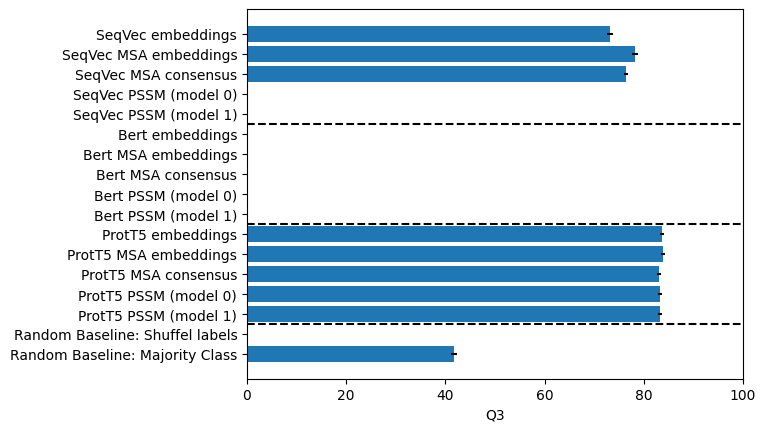

In [236]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, q3, xerr=se, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim([0, 100])

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')

plt.show()

Plot difference to majority class prediction

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


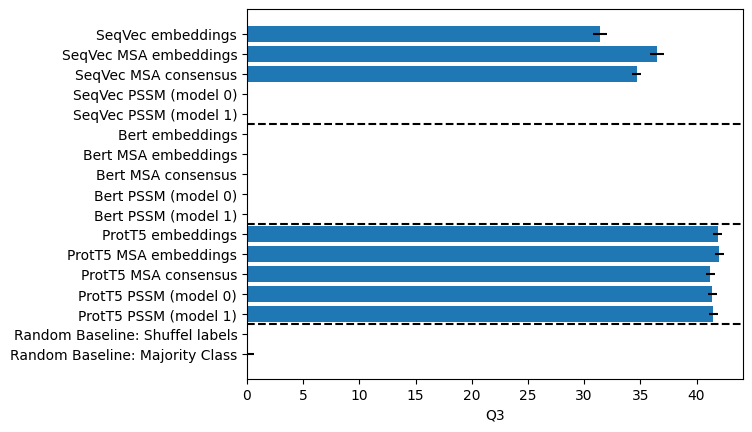

In [237]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))

bars = ax.barh(y_pos, difference_to_random, xerr=se, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim(left=0)
# ax.bar_label(bars) IndexError

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')

plt.show()

## Plot vertically

In [238]:
x_pos = np.arange(len(labels))

seperator_seqvec = x_pos[4] + (x_pos[5] - x_pos[4])/2
seperator_bert = x_pos[9] + (x_pos[10] - x_pos[9])/2
seperator_t5 = x_pos[14] + (x_pos[15] - x_pos[14])/2

Plot Q3 only

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_15416\3034423110.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


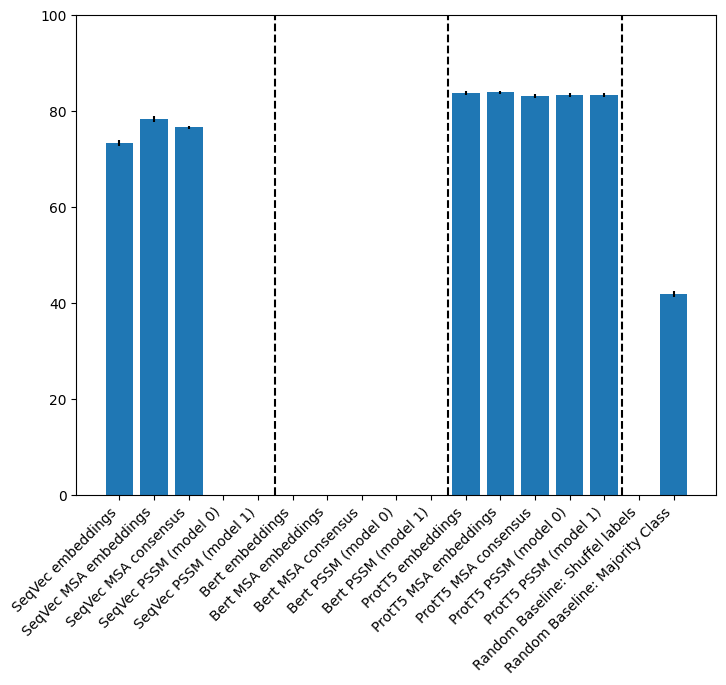

In [239]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(labels, q3, yerr=se)
ax.set_ylim([0, 100])
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

Plot difference to majority class prediction

c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\users\kyrae\pycharmprojects\rostlab\ev-embeddings-figures\venv\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_15416\1024616482.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


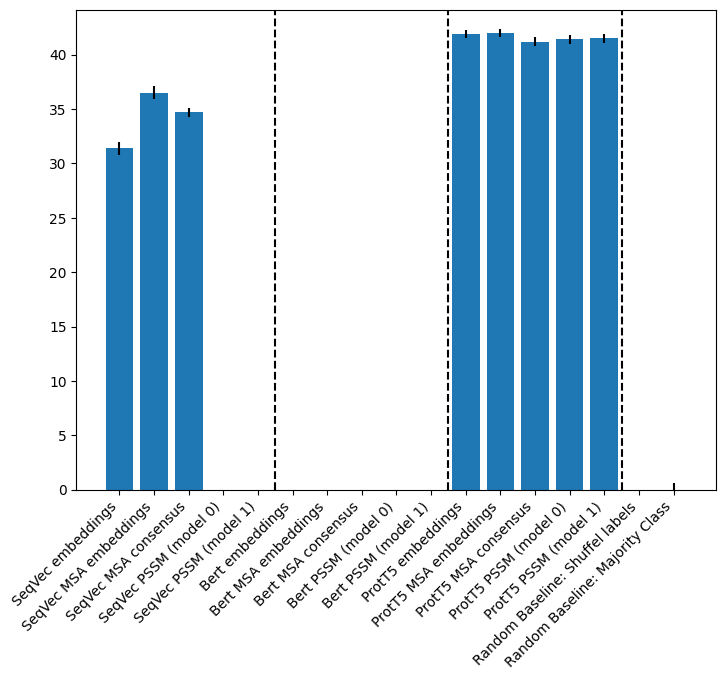

In [240]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_pos = np.arange(len(labels))


ax.bar(labels, difference_to_random, yerr=se)
ax.set_ylim(bottom=0)
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

# Plot Conservation from embeddings vs. Embeddings + Evolutionary Information (MSAs)

<span style="color:red">TODO!</span>

# Plot SOTA with Evolutionary Information vs. Embeddings

<span style="color:red">TODO: caluclate random for all tasks, more tasks</span>

C:\Users\kyrae\AppData\Local\Temp\ipykernel_15416\72087825.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_mcc_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_15416\72087825.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.axvline(x=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_15416\72087825.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(grouped_qx_labels, rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_15416\72087825.py:22: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.axvline(x=[1.5], 

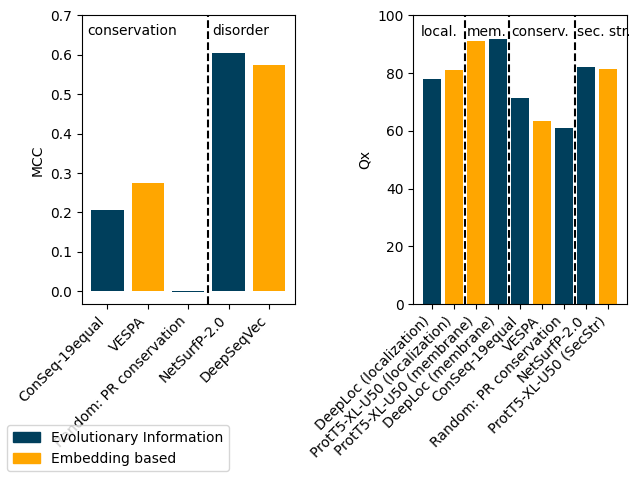

In [257]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(grouped_mcc_labels, [float(entry) for entry in mcc], color=['#003f5c' if entry==0 else "#ffa600" for entry in mcc_is_embedding_based])
ax1.set_xticklabels(grouped_mcc_labels, rotation=45, ha='right')
ax1.set(ylabel="MCC")
ax1.set_ylim(top=0.7)
ax1.annotate('conservation',xy=(-0.5, 0.65))
ax1.annotate('disorder',xy=(2.6, 0.65))
ax1.axvline(x=[2.5],  color='black', ls='--')

grouped_qx_labels_as_strings = [str(entry) for entry in grouped_qx_labels]
qx_bars_as_float = [float(entry) for entry in qx]
qx_colors = ['#003f5c' if entry==0 else "#ffa600" for entry in qx_is_embedding_based]

ax2.bar(grouped_qx_labels_as_strings, qx_bars_as_float, color=qx_colors)
ax2.set_xticklabels(grouped_qx_labels, rotation=45, ha='right')
ax2.set(ylabel="Qx")
ax2.set_ylim(top=100)
ax2.annotate('local.',xy=(-0.5, 93))
ax2.annotate('mem.',xy=(1.6, 93))
ax2.annotate('conserv.',xy=(3.6, 93))
ax2.annotate('sec. str.',xy=(6.6, 93))
ax2.axvline(x=[1.5],  color='black', ls='--')
ax2.axvline(x=[3.5],  color='black', ls='--')
ax2.axvline(x=[6.5],  color='black', ls='--')


legend_EI = mpatches.Patch(color='#003f5c', label='Evolutionary Information')
legend_EB = mpatches.Patch(color='#ffa600', label='Embedding based')

fig.legend(handles=[legend_EI, legend_EB], loc='lower left')
fig.tight_layout()
